<a href="https://colab.research.google.com/github/hongrolee/Python/blob/main/colab/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%A4%91%EA%B8%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 누락 데이터 처리

## 1) 누락 데이터 확인

### 데이터 읽어오기

In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/csv/data_preprocessing1.csv'
df = pd.read_csv(file_path, encoding='cp949')

### 누락 확인하기

*   isnull() : 널 확인
*   notnull() : 널이 아닌 요소 확인



In [ ]:
df.isnull()
df.notnull()

## 2) 누락 데이터 개수 확인하기

*   isnull().sum() : 누락값 개수 확인
*   isnull().sum(1) : 행 단위 누락값 개수 확인
*   notnull().sum(1) : 행 단위 실제값 개수 확인



In [36]:
df.isnull().sum()
df.notnull().sum(1)

0      12
1      12
2      11
3      11
4      12
       ..
415    12
416    10
417    12
418    12
419    12
Length: 420, dtype: int64

## 3) 누락 데이터 제거하기



### 행 제거

* dropped_all_row = df.dropna(axis=0)



In [24]:
dropped_all_row = df.dropna(axis=0)

### 열 제거

*   dropped_all_column = df.dropna(axis=1)



In [25]:
dropped_all_column = df.dropna(axis=1)

### 특정 행 또는 열 제거

*   df[행이름].dropna()



In [ ]:
df['대여소번호'].dropna()
df['대여소 번호', '대여거치대', '이용시간']

### 누락값이 들어있는 행 모두 삭제

*   df[[열이름,열이름,...,열이름]].dropna(axis=0)



In [ ]:
df[['대여소번호','대여소거치대','이용시간']].dropna(axis=0)

### 누락값이 들어있는 열 모두 삭제

*   df[[열이름,열이름,...,열이름]].dropna(axis=1)



In [ ]:
df[['대여소번호', '대여거치대','이용시간']].dropna(axis=1)

## 4) 누락 데이터 수정



### 누락값을 특정값(0)로 대체

*  fillna(0)



In [ ]:
df_1 = df.fillna(0)

### 특정 열의 누락값을 특정값(0)로 대체

# 2. 이상 데이터 처리

*   이상 데이터 : 정상치에서 벗어난 데이터 (outlier), 자료에서 예상과는 다른 패턴을 보이는 개체 또는 자료



## 1) 이상 데이터 확인

### 파일 읽어오기
* bicycle_out.csv



In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/data_preprocessing2.csv'
df = pd.read_csv(file_path, encoding='cp949')

### 이상값 확인 후 제거

In [ ]:
df1 = df.drop(4,0)

## 2) 이상 데이터 시각화

### 이용시간 이상치 시각화

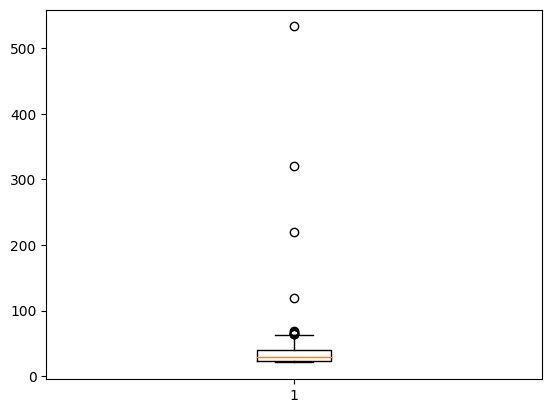

In [21]:
import matplotlib.pylab as plt
plt.boxplot(df['나이'])
plt.show()

## 3) 이상 데이터 처리 방법

*   drop
*   update
*   다른 변수로 변환
*   resampling
*   case 분리 분석



In [22]:
df[df['나이']>500]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533


# 4. 중복 데이터

## 1) 중복 데이터 확인

### 데이터 읽기

In [15]:
file_path = '/content/drive/MyDrive/Colab Notebooks/csv/data_preprocessing3.csv'
df = pd.read_csv(file_path, encoding='cp949')

### 중복 데이터 찾기

*   duplicated()
*   True, False의 boolean 형태의 Series 반환



In [18]:
df.duplicated(['이용거리','나이'])

0      False
1       True
2      False
3      False
4      False
       ...  
415     True
416     True
417     True
418     True
419     True
Length: 420, dtype: bool

## 2) 중복 시작과 끝 확인
*   duplicated() keep 옵션 : 중복값이 있으면 처음이나 끝에 무엇을 남길지 확인
  *   keep = 'first' : 중복값이 있으면 False로
  *   keep = 'last'  : 중복값이 있으면 True로
  *   keep = False   : 중복이면 무조건 True



In [19]:
df.duplicated(['이용거리'],keep='first')

0      False
1       True
2      False
3      False
4      False
       ...  
415    False
416     True
417     True
418     True
419    False
Length: 420, dtype: bool

## 3) 중복 데이터 제거

### 유일한 1개의 키만 남기고 나머지 중복 제거

In [20]:
df.drop_duplicates(['이용거리'],keep='first')

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
410,SPB-18614,2019-11-14 23:07,391,정동길입구,5.0,2019-11-14 23:49,101,(구)합정동 주민센터,3.0,40.0,7510.0,28
413,SPB-25161,2019-11-15 3:13,106,합정역 7번출구 앞,6.0,2019-11-15 3:18,101,(구)합정동 주민센터,1.0,3.0,640.0,21
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
